C:\Users\15203\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


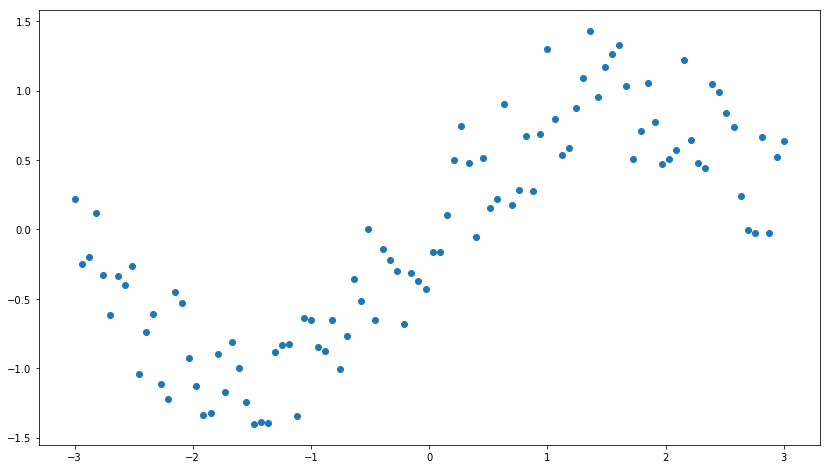

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(14,8)#可视化时图像的长和宽

n_observations=100  #样本的个数
xs=np.linspace(-3,3,n_observations)
ys=np.sin(xs)+np.random.uniform(-0.5,0.5,n_observations)

fig,ax=plt.subplots(1,1,figsize=(14,8))

#散点图的绘制
ax.scatter(xs,ys)
#显示
fig.show()   

In [3]:
X = tf.placeholder(tf.float32,name='X')
Y = tf.placeholder(tf.float32,name='Y')

In [4]:
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name="bias")

In [4]:
Y_pred=tf.add(tf.multiply(X,W),b)
#添加高次项
W_2=tf.Variable(tf.random_normal([1]),name='weight_2')
Y_pred=tf.add(tf.multiply(tf.pow(X,2),W_2),Y_pred)
W_3=tf.Variable(tf.random_normal([1]),name='weight_3')
Y_pred=tf.add(tf.multiply(tf.pow(X,3),W_3),Y_pred)

In [7]:
sample_num=xs.shape[0]
loss=tf.reduce_sum(tf.pow(Y_pred -Y,2))/sample_num

In [8]:
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [9]:
n_samples=xs.shape[0]
init=tf.global_variables_initializer()

with tf.Session() as sess:
    #记得初始化所有变量
    sess.run(init)
    writer=tf.summary.FileWriter('./graphs/polynomial_reg',sess.graph)
    
    #训练模型
    for i in range(1000):
        total_loss=0
        for x,y in zip(xs,ys):
            #通过feed_dic把数据灌进去
            _,l=sess.run([optimizer,loss],feed_dict={X:x,Y:y})
            total_loss += l
        if i%20 ==0:
            print("Epoch {0}:{1}".format(i,total_loss/n_samples))
    writer.close()
    W,W_2,W_3,b=sess.run([W,W_2,W_3,b])

Epoch 0:0.46082167976500843
Epoch 20:0.007504573618240329
Epoch 40:0.005408172833695062
Epoch 60:0.003964468574040438
Epoch 80:0.002977552877107712
Epoch 100:0.002302591114853385
Epoch 120:0.001840712015156285
Epoch 140:0.001524433311104758
Epoch 160:0.0013076822262481614
Epoch 180:0.001158990464340526
Epoch 200:0.001056870613440708
Epoch 220:0.0009866392702075188
Epoch 240:0.0009382627198070281
Epoch 260:0.0009048739361559654
Epoch 280:0.0008817819674615634
Epoch 300:0.0008657696867658871
Epoch 320:0.0008546333635597847
Epoch 340:0.0008468639555371382
Epoch 360:0.0008414219652283794
Epoch 380:0.0008375937629887175
Epoch 400:0.0008348867278368744
Epoch 420:0.0008329640233478131
Epoch 440:0.0008315892335656372
Epoch 460:0.0008306011144878767
Epoch 480:0.000829885481101087
Epoch 500:0.0008293641062023482
Epoch 520:0.000828981582969055
Epoch 540:0.0008286986147460506
Epoch 560:0.0008284875441250694
Epoch 580:0.0008283295861816184
Epoch 600:0.0008282102748953867
Epoch 620:0.000828119555466

In [11]:
print('W:'+str(W[0]))
print('W_2:'+str(W_2[0]))
print('W_3:'+str(W_3[0]))
print('b:'+str(b[0]))

W:0.86698586
W_2:0.016728103
W_3:-0.100521855
b:-0.0063377596


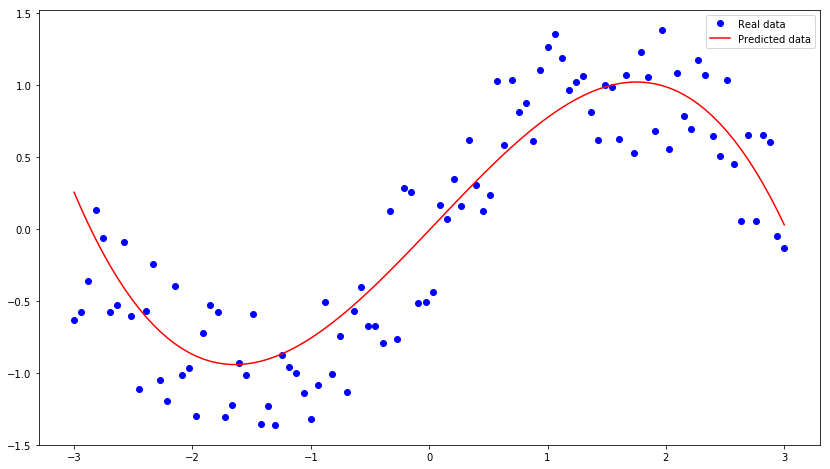

In [14]:
plt.plot(xs,ys,'bo',label='Real data')
plt.plot(xs, xs*W + np.power(xs,2)*W_2 + np.power(xs,3)*W_3 + b,'r',label='Predicted data')
plt.legend()
plt.show()